In [1]:

import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_dataset_mk_missing.csv')


In [3]:
df.head()

,city,area_sq_meters,num_rooms,floor,year_built,distance_from_center_km,price
0,NaN,80.0,4.0,5.0,2009.0,3.55,150804.0
1,Skopje,92.1,5.0,3.0,2008.0,3.54,178480.0
2,Skopje,97.4,5.0,0.0,2002.0,2.41,168418.0
3,Skopje,49.5,3.0,5.0,2024.0,3.97,90170.0
4,Skopje,NaN,3.0,2.0,NaN,3.75,77454.0


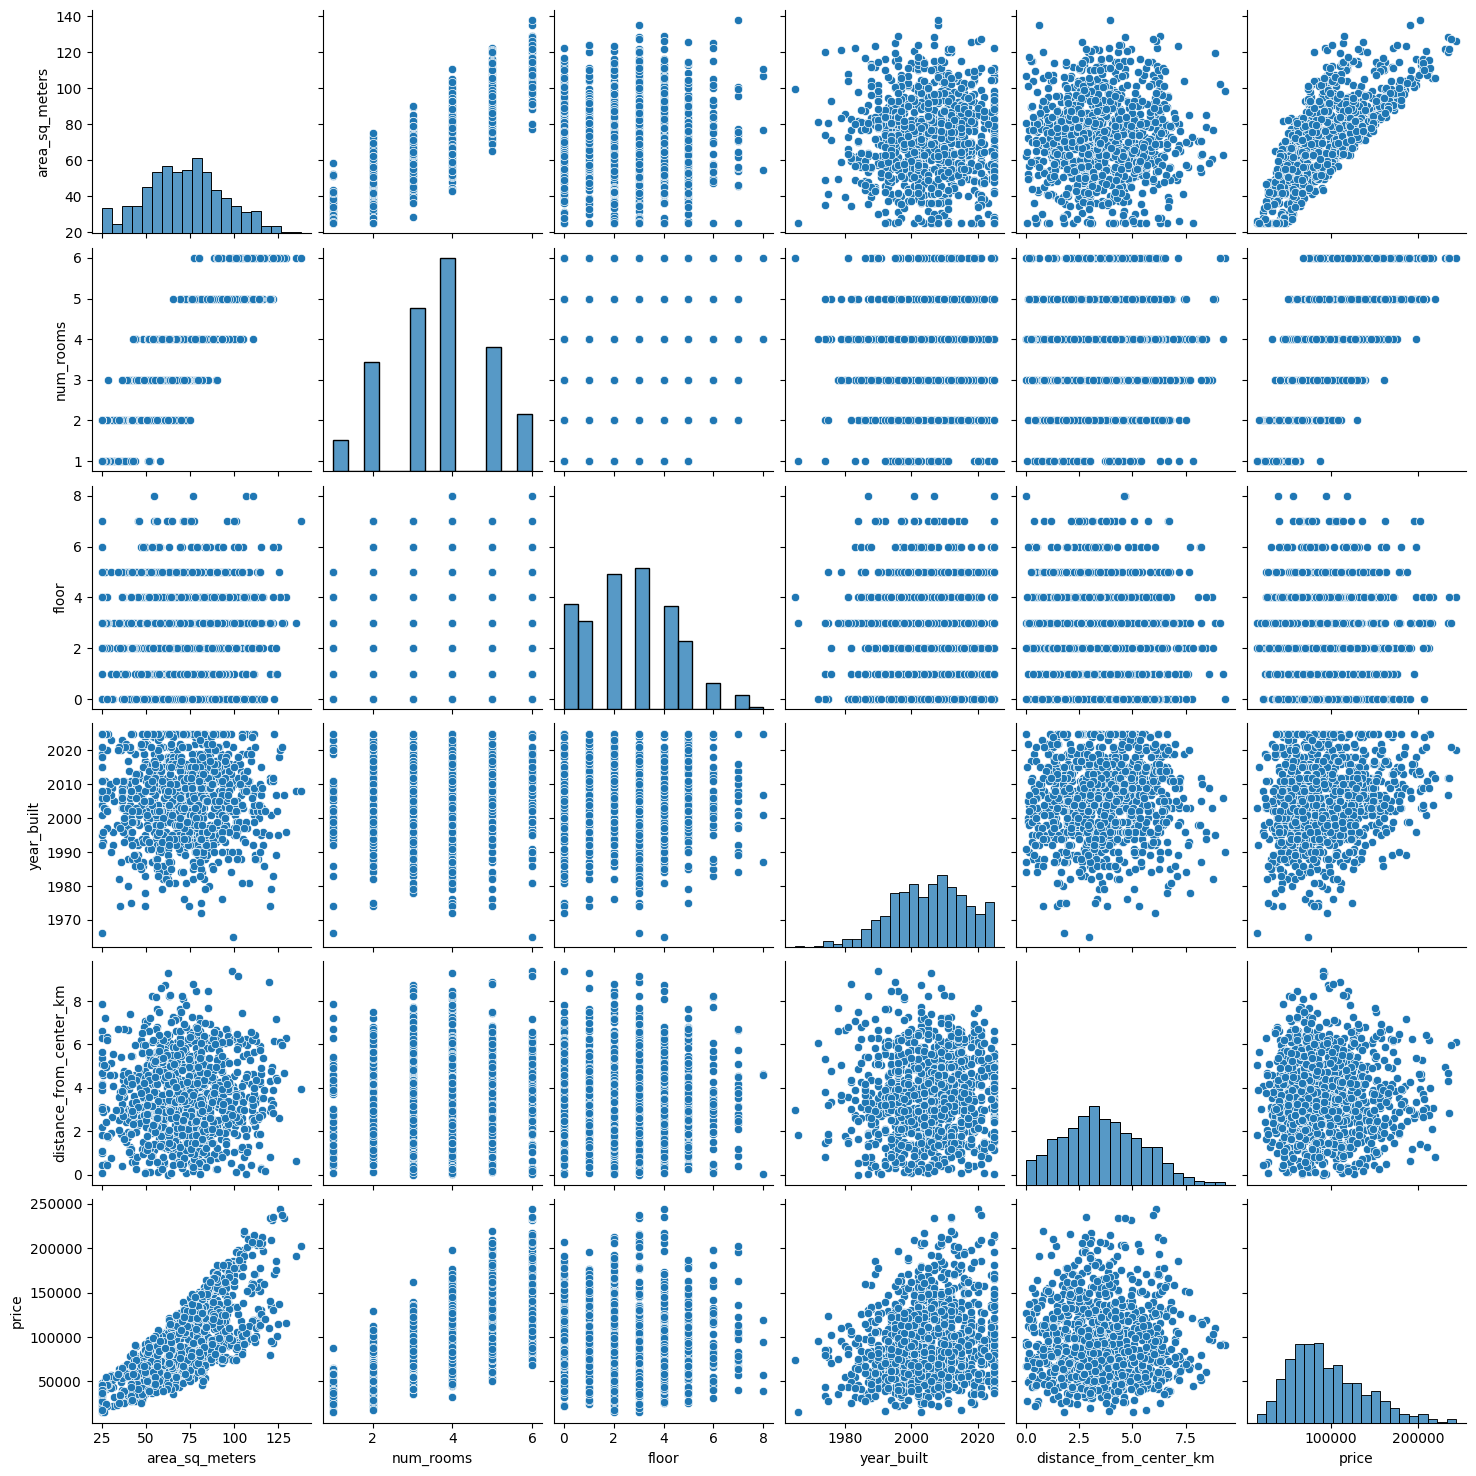

In [4]:
sns.pairplot(df)


<Axes: >

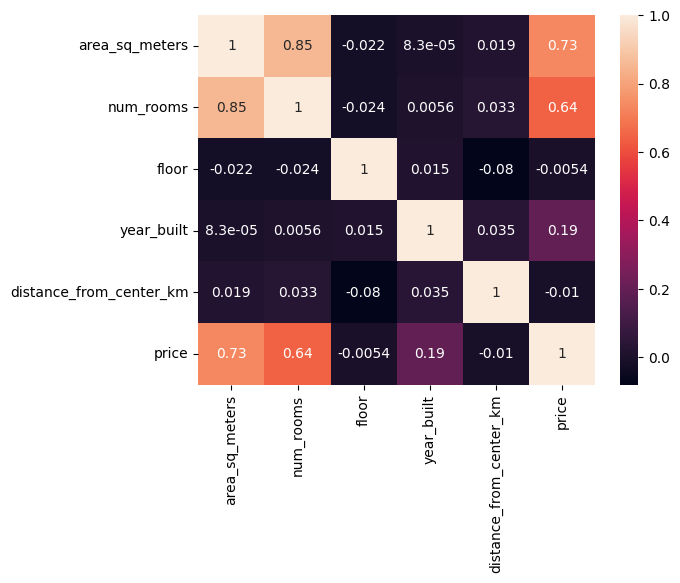

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True,)


In [6]:
df.isnull().sum()


city                        85
area_sq_meters              92
num_rooms                   86
floor                      110
year_built                  98
distance_from_center_km     72
price                       95
dtype: int64

In [7]:
#price ni e target,so e regresija

In [8]:
df.dropna(subset=['price'], inplace=True)


In [9]:
df.isnull().sum()


city                        78
area_sq_meters              89
num_rooms                   78
floor                      108
year_built                  93
distance_from_center_km     65
price                        0
dtype: int64

<Axes: xlabel='city'>

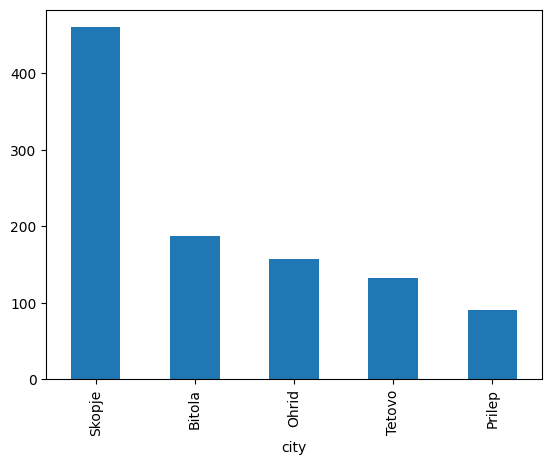

In [10]:
df['city'].value_counts().plot.bar()


In [11]:

cities = pd.get_dummies(df['city'], prefix='city')
df = pd.concat([df, cities], axis=1)
df.drop(columns=['city'], inplace=True)

In [14]:
#one hot, za skopje u br  i vidi dole e kako nova kolona

In [15]:
df.isnull().sum()


area_sq_meters              89
num_rooms                   78
floor                      108
year_built                  93
distance_from_center_km     65
price                        0
city_Bitola                  0
city_Ohrid                   0
city_Prilep                  0
city_Skopje                  0
city_Tetovo                  0
dtype: int64

<Axes: >

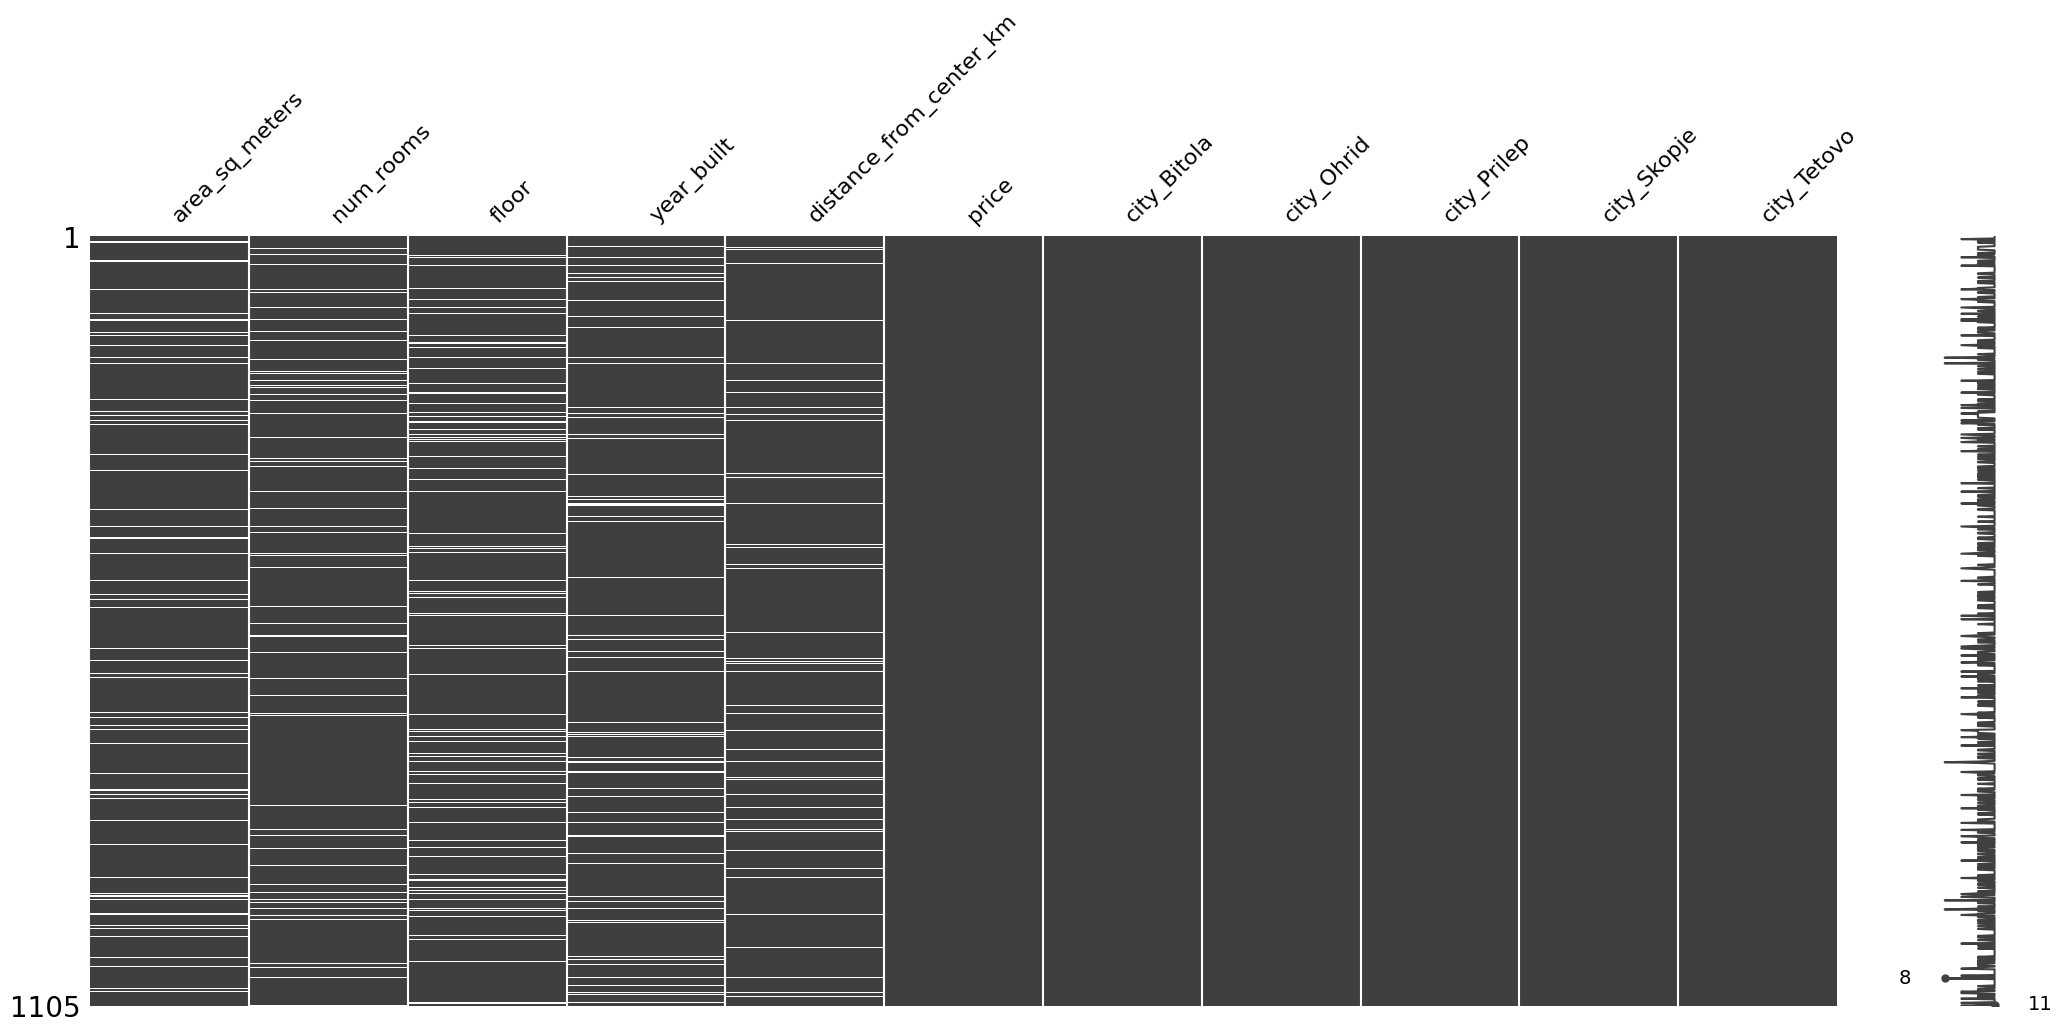

In [16]:
msno.matrix(df)


In [18]:
#За што служи?

#✔️ Да видиш каде имаш missing data
#✔️ Да решиш дали треба имутација
#✔️ Да одлучиш дали да избришеш некои колони/редови
#✔️ Да ја видиш структурата на податоците пред моделирање

<Axes: >

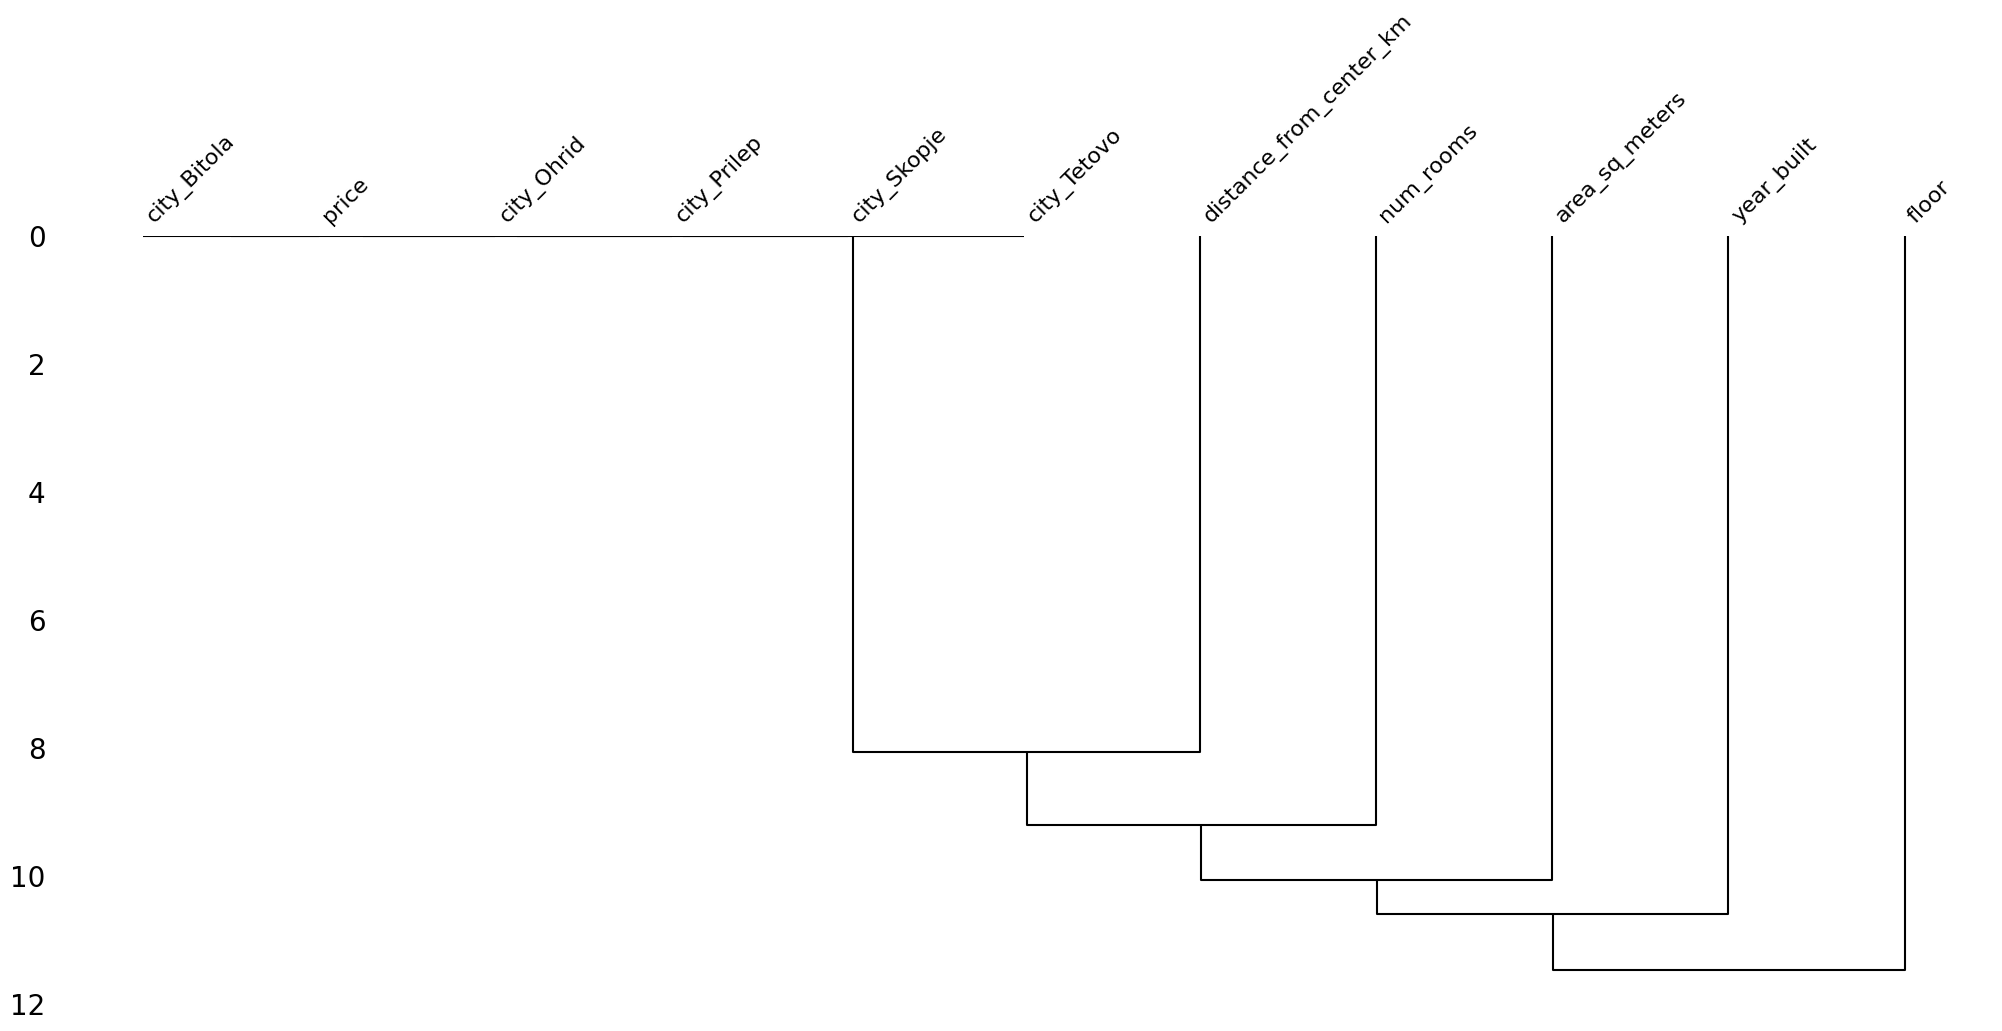

In [19]:
msno.dendrogram(df)


In [20]:
iterative_imputer = IterativeImputer()
df[["area_sq_meters", "num_rooms"]]= iterative_imputer.fit_transform(df[["area_sq_meters", "num_rooms"]])

In [21]:
#za da potpolnis missing val,podobro od knn,mean,median

In [26]:
df.isnull().sum()
#za via trite ce stavime histogram prvo

area_sq_meters               0
num_rooms                    0
floor                      108
year_built                  93
distance_from_center_km     65
price                        0
city_Bitola                  0
city_Ohrid                   0
city_Prilep                  0
city_Skopje                  0
city_Tetovo                  0
dtype: int64

<Axes: >

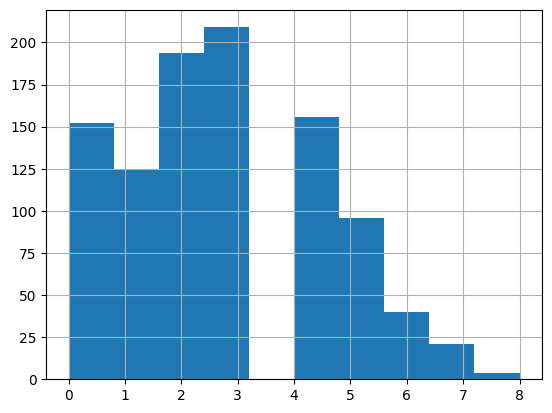

In [27]:
df['floor'].hist()


<Axes: >

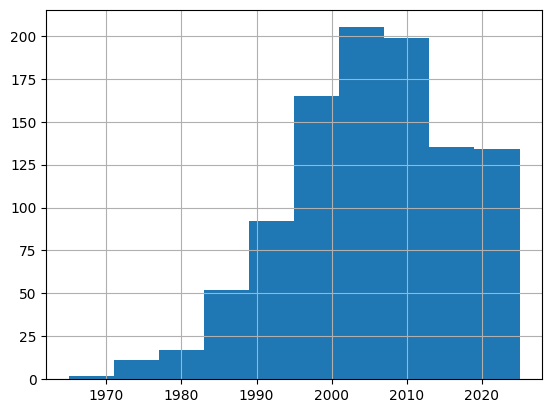

In [28]:
df['year_built'].hist()


<Axes: >

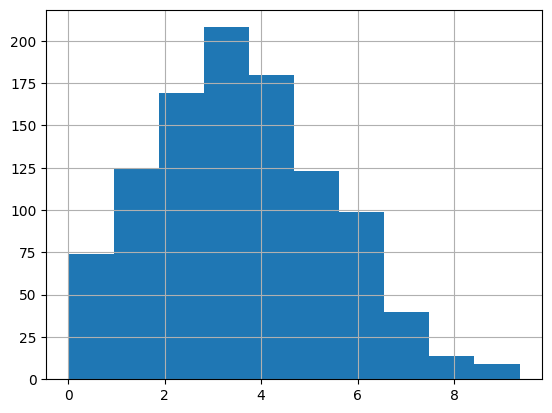

In [29]:
df['distance_from_center_km'].hist()


In [30]:
df.drop(columns=['floor'], inplace=True)
df['year_built'] = df['year_built'].fillna(df['year_built'].median())
df['distance_from_center_km'] = df['distance_from_center_km'].fillna(df['distance_from_center_km'].median())
#ke gi dropneme

In [31]:
df.isnull().sum()


area_sq_meters             0
num_rooms                  0
year_built                 0
distance_from_center_km    0
price                      0
city_Bitola                0
city_Ohrid                 0
city_Prilep                0
city_Skopje                0
city_Tetovo                0
dtype: int64

In [32]:
df.head()


,area_sq_meters,num_rooms,year_built,distance_from_center_km,price,city_Bitola,city_Ohrid,city_Prilep,city_Skopje,city_Tetovo
0,80.000000,4.0,2009.0,3.55,150804.0,False,False,False,False,False
1,92.100000,5.0,2008.0,3.54,178480.0,False,False,False,True,False
2,97.400000,5.0,2002.0,2.41,168418.0,False,False,False,True,False
3,49.500000,3.0,2024.0,3.97,90170.0,False,False,False,True,False
4,62.580859,3.0,2005.0,3.75,77454.0,False,False,False,True,False


In [34]:
#SAMO KAJ ONE HOT MOZE T/F ILI 1/0
"""
Енкодер	Може True/False?	Треба 0/1 или друго
One-Hot	✔️ Може	✔️ подобро 0/1
LabelEncoder	❌ Не	INT
OrdinalEncoder	❌ Не	INT
TargetEncoder	❌ Не	float
BinaryEncoder	❌ Не	0/1 како број
FrequencyEncoder	❌ Не	float или int
"""

'\nЕнкодер\tМоже True/False?\tТреба 0/1 или друго\nOne-Hot\t✔️ Може\t✔️ подобро 0/1\nLabelEncoder\t❌ Не\tINT\nOrdinalEncoder\t❌ Не\tINT\nTargetEncoder\t❌ Не\tfloat\nBinaryEncoder\t❌ Не\t0/1 како број\nFrequencyEncoder\t❌ Не\tfloat или int\n'

In [35]:
X = df.drop(columns=["price"])
y = df["price"]

In [36]:
#drop u x so e features a y save poso e target

In [37]:
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
)

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")

print("Cross-validation R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())
print("Std of R²:", cv_scores.std())

Cross-validation R² scores: [0.87159684 0.89620477 0.92131    0.89740957 0.95322567]
Mean R²: 0.9079493682477594
Std of R²: 0.027564392518101263


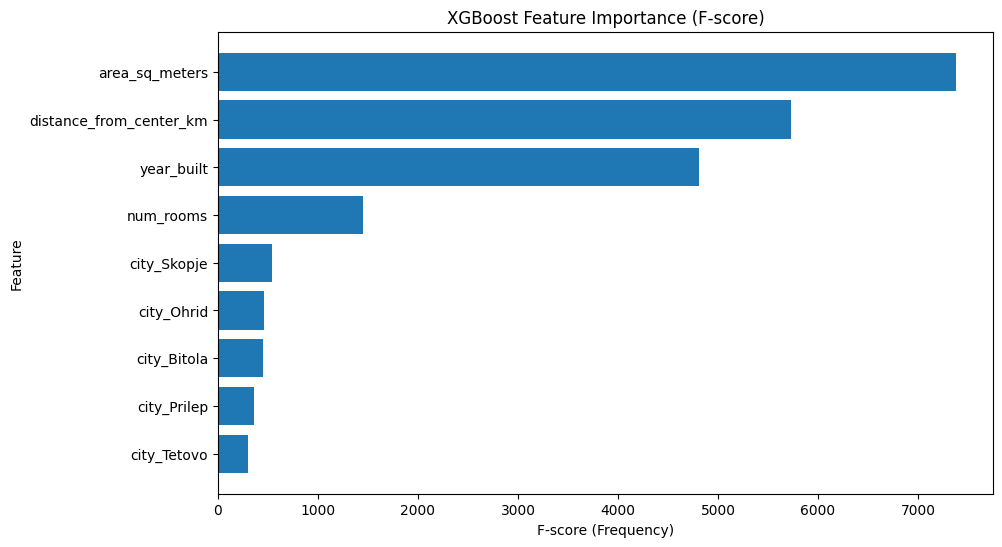

In [39]:
model.fit(X, y)   # ⬅️ мора прво!  dava greska bez voa:

feature_importance = model.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame({'Feature': list(feature_importance.keys()), 'F-score': list(feature_importance.values())})
importance_df = importance_df.sort_values(by='F-score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['F-score'])
plt.xlabel("F-score (Frequency)")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance (F-score)")
plt.gca().invert_yaxis()